## Telecom Churn Assignment

### Problem Statement

#### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Data Preparation & Data Visualization

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for SMOTE analysis
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [3]:
# Reading the data and storing in telecom_df dataframe
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking info on telecom dataframe
telecom_df.info(verbose=1, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
# Checking unique values in the dataset based on mobile number
telecom_df['mobile_number'].nunique()

99999

The dataset has no duplicate values. 

We will drop the column 'circle_id' and date columns as we will not use it for our analysis

In [6]:
# Dropping the columns not required for our analysis
telecom_df = telecom_df.drop(['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis=1)
telecom_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3

In [7]:
### Checking percentage of null values in dataset

round(100*telecom_df.isnull().sum()/len(telecom_df.index), 2).sort_values(ascending=False)

count_rech_3g_6       74.85
av_rech_amt_data_6    74.85
arpu_3g_6             74.85
count_rech_2g_6       74.85
night_pck_user_6      74.85
fb_user_6             74.85
total_rech_data_6     74.85
max_rech_data_6       74.85
arpu_2g_6             74.85
arpu_2g_7             74.43
night_pck_user_7      74.43
count_rech_2g_7       74.43
max_rech_data_7       74.43
arpu_3g_7             74.43
count_rech_3g_7       74.43
fb_user_7             74.43
av_rech_amt_data_7    74.43
total_rech_data_7     74.43
arpu_3g_9             74.08
arpu_2g_9             74.08
count_rech_3g_9       74.08
av_rech_amt_data_9    74.08
night_pck_user_9      74.08
count_rech_2g_9       74.08
max_rech_data_9       74.08
total_rech_data_9     74.08
fb_user_9             74.08
count_rech_3g_8       73.66
night_pck_user_8      73.66
count_rech_2g_8       73.66
max_rech_data_8       73.66
arpu_2g_8             73.66
total_rech_data_8     73.66
arpu_3g_8             73.66
fb_user_8             73.66
av_rech_amt_data_8  

We will fill the null values for categorical data

In [8]:
# Checking the value counts for night_pck_user_6
telecom_df['night_pck_user_6'].value_counts(dropna = False, normalize = True)

NaN    0.748467
0.0    0.245222
1.0    0.006310
Name: night_pck_user_6, dtype: float64

In [9]:
# Checking the value counts for night_pck_user_7
telecom_df['night_pck_user_7'].value_counts(dropna = False, normalize = True)

NaN    0.744287
0.0    0.249822
1.0    0.005890
Name: night_pck_user_7, dtype: float64

In [10]:
# Checking the value counts for night_pck_user_8
telecom_df['night_pck_user_8'].value_counts(dropna = False, normalize = True)

NaN    0.736607
0.0    0.257903
1.0    0.005490
Name: night_pck_user_8, dtype: float64

In [11]:
# Checking the value counts for night_pck_user_9
telecom_df['night_pck_user_9'].value_counts(dropna = False, normalize = True)

NaN    0.740777
0.0    0.255083
1.0    0.004140
Name: night_pck_user_9, dtype: float64

In [12]:
# Imputing null values of night_pck_user_columns with '-1'
telecom_df[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']] = telecom_df[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']].fillna(-1.0)

In [13]:
# Imputing all other null values with value 0
telecom_df = telecom_df.fillna(0)

In [14]:
# Checking the percentage of null values again
round(100*telecom_df.isnull().sum()/len(telecom_df.index), 2).sort_values(ascending=False)

sep_vbc_3g            0.0
total_og_mou_8        0.0
total_og_mou_6        0.0
og_others_9           0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
total_og_mou_7        0.0
total_og_mou_9        0.0
std_ic_t2f_mou_7      0.0
loc_ic_t2t_mou_6      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_9          0.0
loc_ic_mou_8

In [15]:
# Deriving new metrics for Total Revenue per User for 6, 7, 8 ,9 month
telecom_df['total_revenue_6'] = (telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']) + telecom_df['total_rech_amt_6']
telecom_df['total_revenue_7'] = (telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']) + telecom_df['total_rech_amt_7']
telecom_df['total_revenue_8'] = (telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8']) + telecom_df['total_rech_amt_8']
telecom_df['total_revenue_9'] = (telecom_df['av_rech_amt_data_9'] * telecom_df['total_rech_data_9']) + telecom_df['total_rech_amt_9']
telecom_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_revenue_6,total_revenue_7,total_revenue_8,total_revenue_9
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,

In [16]:
# Average revenue for month 6 & 7
telecom_df['avg_revenue_6_7'] = (telecom_df['total_revenue_6'] + telecom_df['total_revenue_7']) / 2

In [17]:
# Filtering high value customers and storing in dataframe df
df = telecom_df[(telecom_df.avg_revenue_6_7 > telecom_df.avg_revenue_6_7.quantile(0.7))]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_revenue_6,total_revenue_7,total_revenue_8,total_revenue_9,avg_revenue_6_7
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.7

In [18]:
# Checking shape of new dataframe
df.shape

(29953, 218)

In [19]:
# Creating Churn Variable, our targets from month 9
df['churn'] = (df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0).astype(int)
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_revenue_6,total_revenue_7,total_revenue_8,total_revenue_9,avg_revenue_6_7,churn
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57

In [20]:
## 9th Month Columns 
month9_cols = [col for col in df.columns if '_9' in col]
print(month9_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_revenue_9']


In [21]:
# Dropping all the columns for 9th month to avoid data leakage
df = df.drop(month9_cols, axis=1)
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_revenue_6,total_revenue_7,total_revenue_8,avg_revenue_6_7,churn
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,504.0,559.0,1
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,

In [22]:
# Checking shape of df dataframe
df.shape

(29953, 167)

In [23]:
# Revenue in 8th Month Compared to 6 and 7 month
df['revenue_compare_8'] = df['total_revenue_8'] - df['avg_revenue_6_7']
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_revenue_6,total_revenue_7,total_revenue_8,avg_revenue_6_7,churn,revenue_compare_8
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,504.0,559.0,1,-55.0
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,

In [24]:
## 8th Month Columns 
month8_cols = [col for col in df.columns if '_8' in col]
print(month8_cols)

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'total_revenue_8', 'revenue_compare_8']


In [25]:
# Dropping all the 8th month column, we will not use it for our analysis
df = df.drop(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'total_revenue_8'], axis=1)

In [26]:
# Checking number of features 
df.shape

(29953, 116)

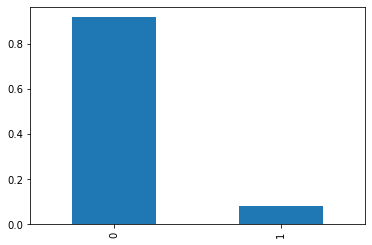

In [27]:
# Checking count of Churn vs Non-Churn Customers
df['churn'].value_counts(1).plot.bar()
plt.show()

In [28]:
# Checking value counts in loc_og_t2o_mou
df['loc_og_t2o_mou'].value_counts()

0.0    29953
Name: loc_og_t2o_mou, dtype: int64

We find that there is only one value count in the 'loc_og_t2o_mou' column. There are also other columns which have such unique values and hence we will drop these columns

In [29]:
# Dropping columns with one value count
df = df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
              'std_ic_t2o_mou_6','std_ic_t2o_mou_7'], axis = 1)

In [30]:
# Checking shape of df dataframe
df.shape

(29953, 109)

In [31]:
df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7',
       'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_revenue_6', 'total_revenue_7', 'avg_revenue_6_7', 'churn',
       'revenue_compare_8'],
      dtype='object', length=109)

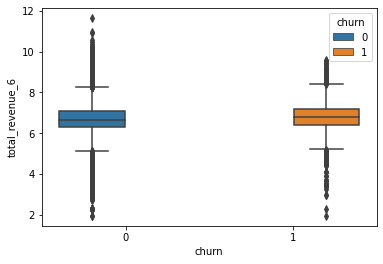

In [32]:
# Creating box plot for 'total_revenue_6'
sns.boxplot(data = df, x = 'churn', y = np.log(df.total_revenue_6), hue = 'churn')
plt.show()

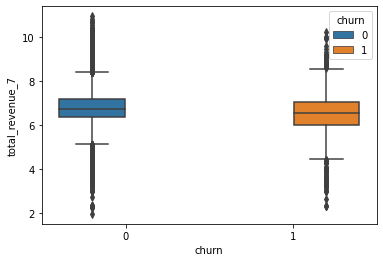

In [33]:
# Creating box plot for 'total_revenue_7'
sns.boxplot(data = df, x = 'churn', y = np.log(df.total_revenue_7), hue = 'churn')
plt.show()

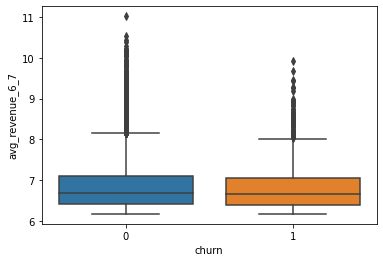

In [34]:
# Creating box plot for 'total_revenue_8'
sns.boxplot(data = df, x = 'churn', y = np.log(df.avg_revenue_6_7))
plt.show()

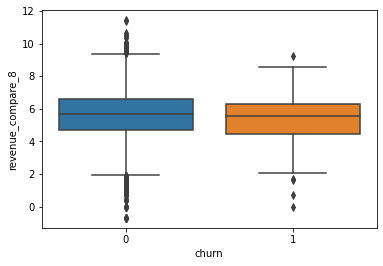

In [35]:
# Creating box plot for 'revenue_compare_8'
sns.boxplot(data = df, x = 'churn', y = np.log(df.revenue_compare_8))
plt.show()

We observe outliers in the 'avg_revenue_6_7' and we will remove these for better modelling

In [36]:
# Removing outliers
Q1 = df['avg_revenue_6_7'].quantile(0.1)
Q3 = df['avg_revenue_6_7'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['avg_revenue_6_7'] >= (Q1 - 1.5 * IQR)) & (df['avg_revenue_6_7'] <= (Q3 + 1.5 * IQR))]

In [37]:
# Percenatge of data retained after removing outliers
perc = 100 * (len(df.index)/29953)
perc

97.83994925383101

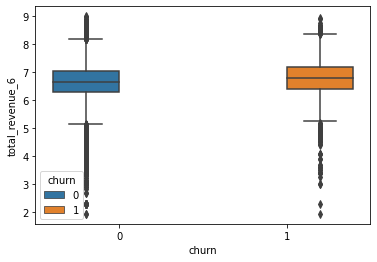

In [38]:
# Creating box plot for 'total_revenue_6'
sns.boxplot(data = df, x = 'churn', y = np.log(df.total_revenue_6), hue = 'churn')
plt.show()

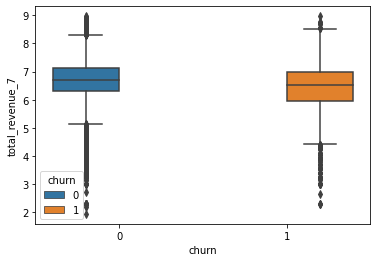

In [39]:
# Creating box plot for 'total_revenue_7'
sns.boxplot(data = df, x = 'churn', y = np.log(df.total_revenue_7), hue = 'churn')
plt.show()

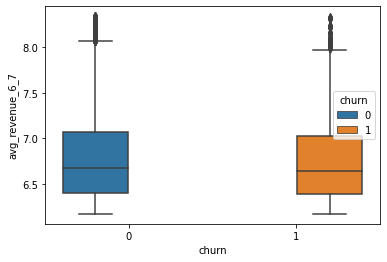

In [40]:
# Creating box plot for 'total_revenue_8'
sns.boxplot(data = df, x = 'churn', y = np.log(df.avg_revenue_6_7), hue = 'churn')
plt.show()

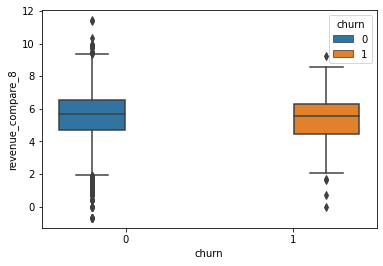

In [41]:
# Creating box plot for 'revenue_compare_8'
sns.boxplot(data = df, x = 'churn', y = np.log(df.revenue_compare_8), hue = 'churn')
plt.show()

In [42]:
# Removing outliers
Q1 = df['revenue_compare_8'].quantile(0.1)
Q3 = df['revenue_compare_8'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['revenue_compare_8'] >= (Q1 - 1.5 * IQR)) & (df['revenue_compare_8'] <= (Q3 + 1.5 * IQR))]

In [43]:
# Percenatge of data retained after removing outliers
perc = 100 * (len(df.index)/29953)
perc

96.37765833138585

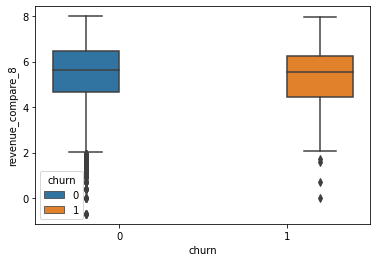

In [44]:
# Creating box plot for 'revenue_compare_8'
sns.boxplot(data = df, x = 'churn', y = np.log(df.revenue_compare_8), hue = 'churn')
plt.show()

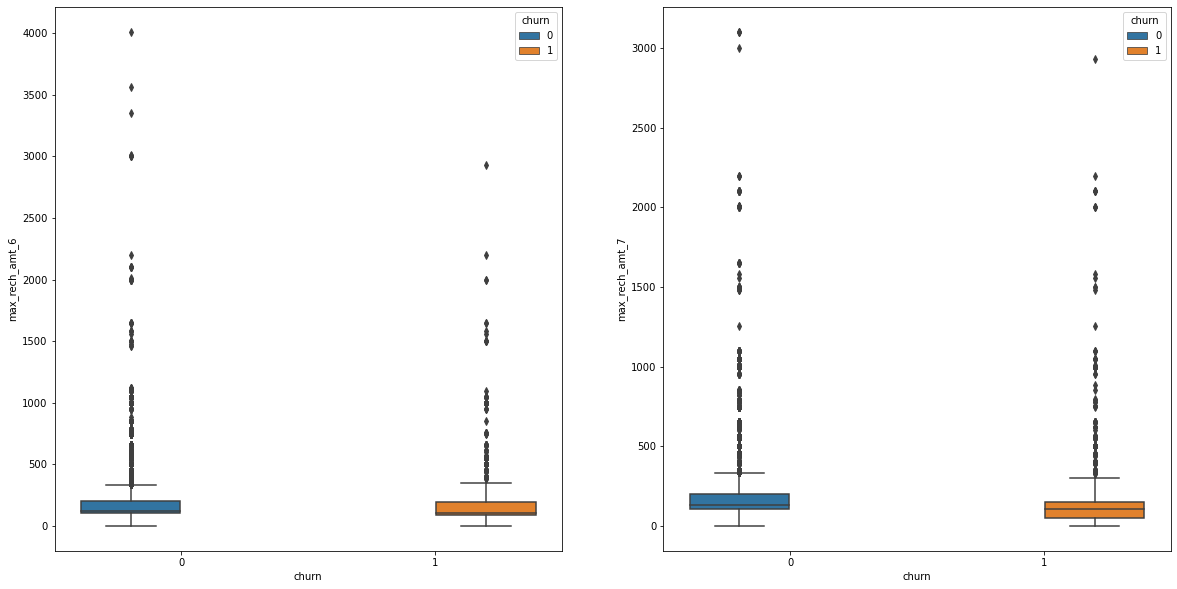

In [45]:
# Creating box plot for 'max_rech_amt'
plt.figure(figsize = (20,10))
max_rech_data_6_plot = plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'churn', y ='max_rech_amt_6',hue = 'churn')

max_rech_data_7_plot = plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'churn', y ='max_rech_amt_7', hue = 'churn')
plt.show()

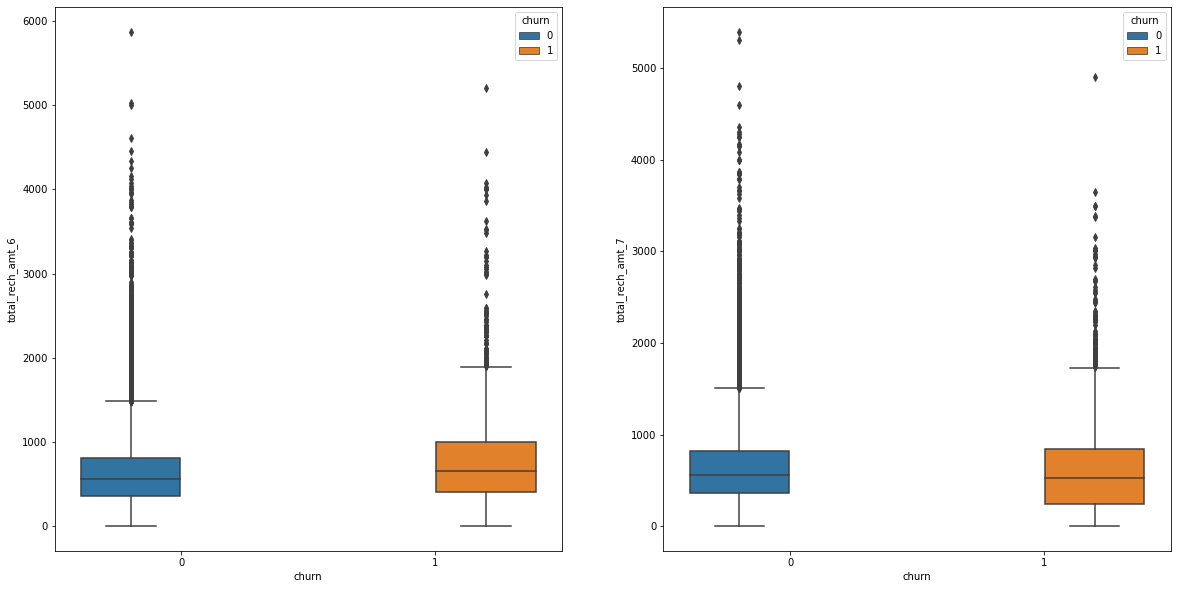

In [46]:
# Creating box plot for 'total_rech_amt'
plt.figure(figsize = (20,10))
total_rech_amt_6_plot = plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'churn', y ='total_rech_amt_6', hue = 'churn')

total_rech_amt_7_plot = plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'churn', y ='total_rech_amt_7', hue = 'churn')
plt.show()

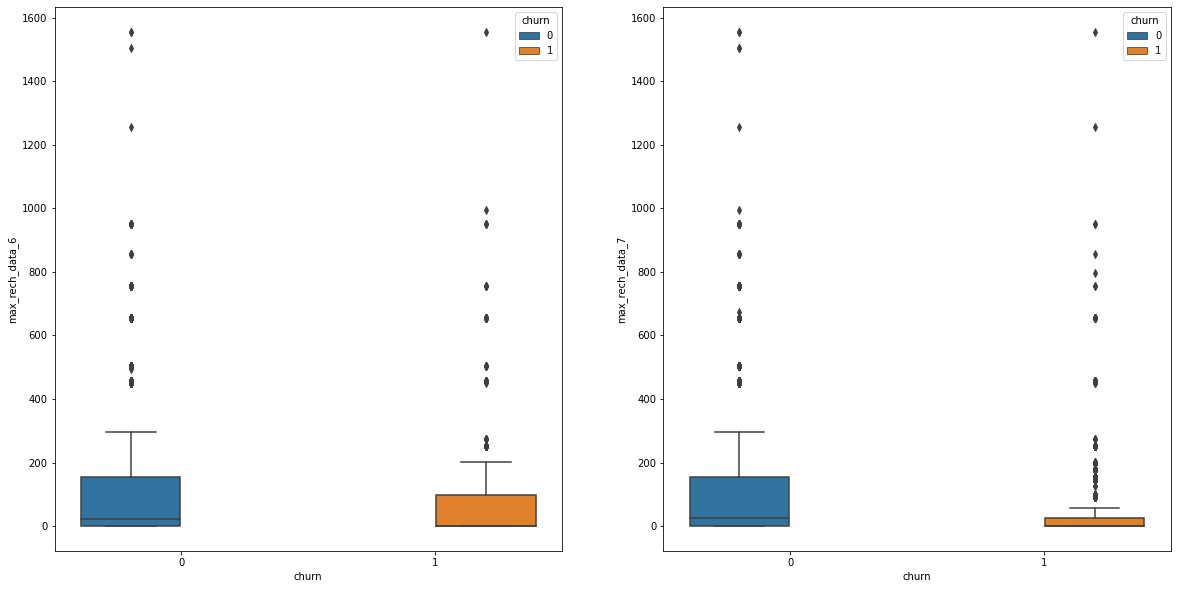

In [47]:
# Creating box plot for 'max_rech_data'
plt.figure(figsize = (20,10))
max_rech_data_6_plot = plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'churn', y ='max_rech_data_6', hue = 'churn')

max_rech_data_7_plot = plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'churn', y ='max_rech_data_7', hue = 'churn')
plt.show()

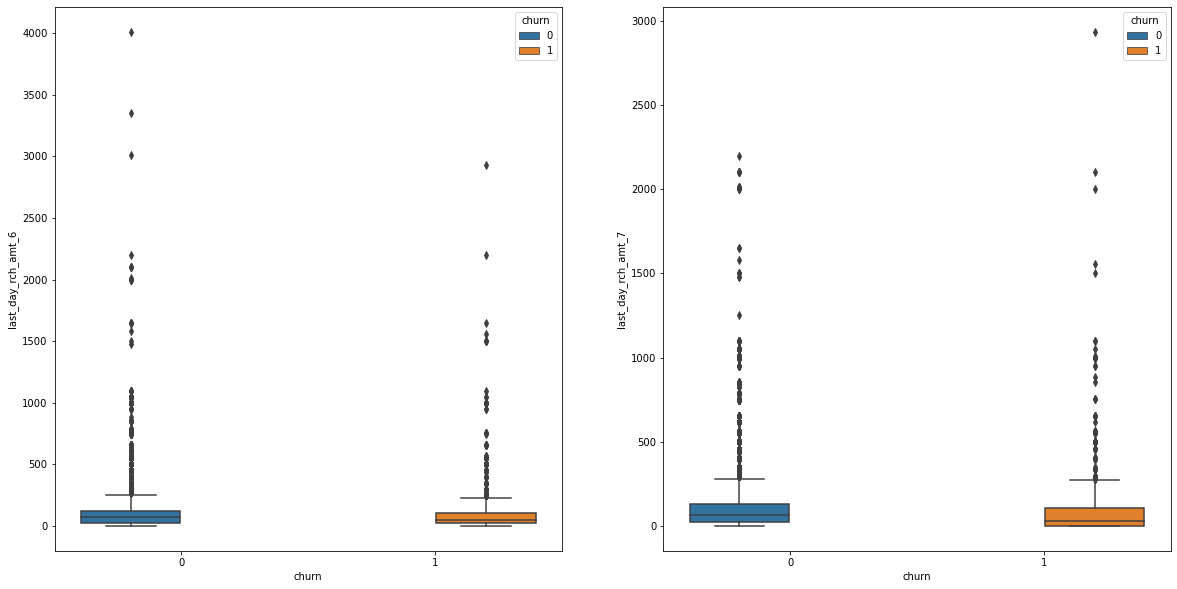

In [48]:
# Creating box plot for 'last_day_rech_amt'
plt.figure(figsize = (20,10))
last_day_rech_amt_6_plot = plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'churn', y ='last_day_rch_amt_6', hue = 'churn')

last_day_rech_amt_7_plot = plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'churn', y ='last_day_rch_amt_7', hue = 'churn')
plt.show()

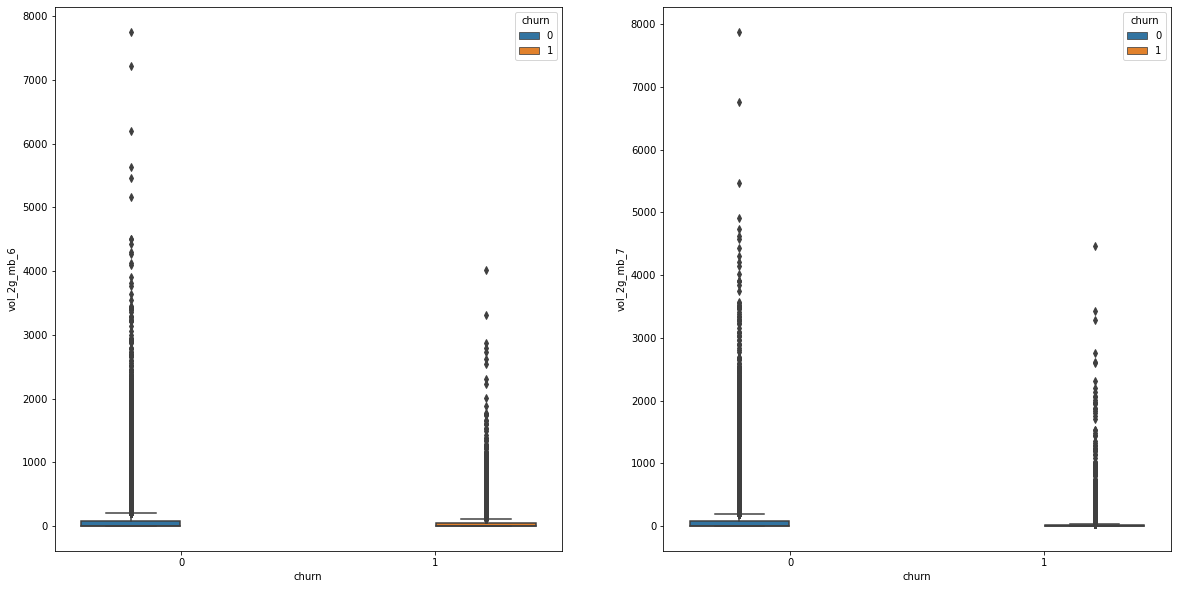

In [49]:
# Creating box plot for 'vol_2g_mb'
plt.figure(figsize = (20,10))
vol_2g_mb_6_plot = plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'churn', y ='vol_2g_mb_6', hue = 'churn')

vol_2g_mb_7_plot = plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'churn', y ='vol_2g_mb_7', hue = 'churn')
plt.show()

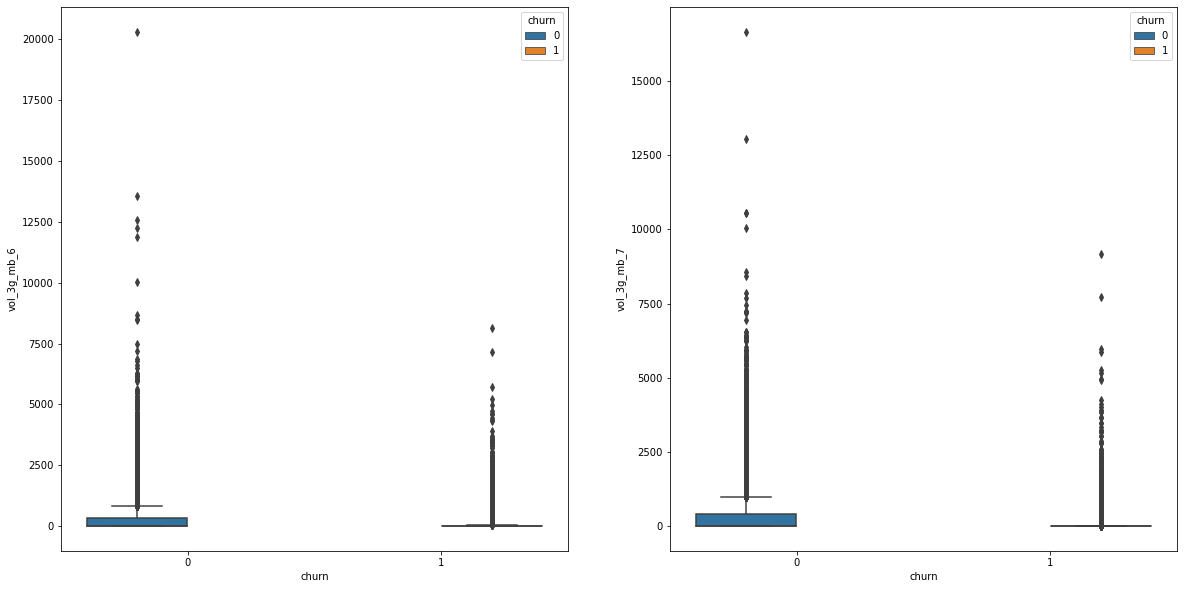

In [50]:
# Creating box plot for 'vol_3g_mb'
plt.figure(figsize = (20,10))
vol_3g_mb_6_plot = plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'churn', y ='vol_3g_mb_6', hue = 'churn')

vol_3g_mb_7_plot = plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'churn', y ='vol_3g_mb_7', hue = 'churn')
plt.show()

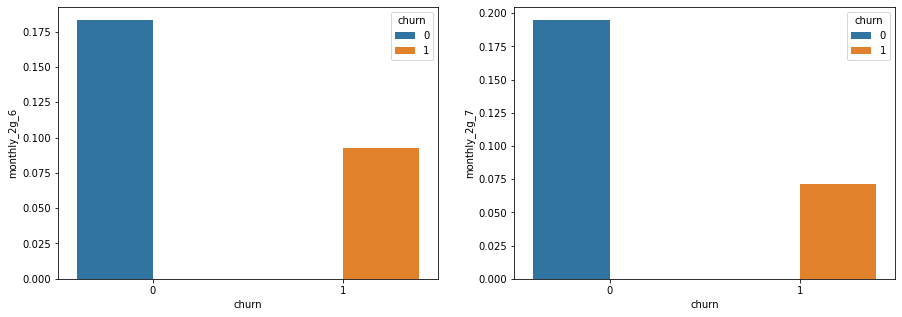

In [51]:
# Creating bar plot for 'monthly_2g'
plt.figure(figsize = (15,5))
monthly_2g_6_plot = plt.subplot(1, 2, 1)
sns.barplot(data = df, x = 'churn', y ='monthly_2g_6', hue = 'churn', ci = None)

monthly_2g_7_plot = plt.subplot(1, 2, 2)
sns.barplot(data = df, x = 'churn', y ='monthly_2g_7', hue = 'churn', ci = None)
plt.show()

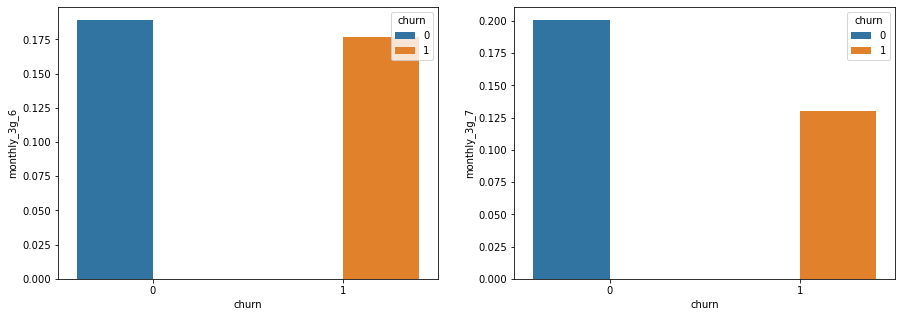

In [52]:
# Creating bar plot for 'monthly_3g'
plt.figure(figsize = (15,5))
monthly_3g_6_plot = plt.subplot(1, 2, 1)
sns.barplot(data = df, x = 'churn', y ='monthly_3g_6', hue = 'churn', ci = None)

monthly_3g_7_plot = plt.subplot(1, 2, 2)
sns.barplot(data = df, x = 'churn', y ='monthly_3g_7', hue = 'churn', ci = None)
plt.show()

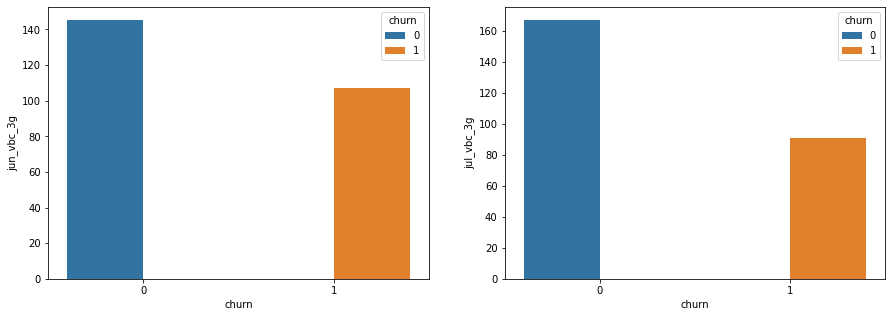

In [53]:
# Creating bar plot for 'vbc_3g'
plt.figure(figsize = (15,5))
vbc_3g_6_plot = plt.subplot(1, 2, 1)
sns.barplot(data = df, x = 'churn', y ='jun_vbc_3g', hue = 'churn', ci = None)

vbc_3g_7_plot = plt.subplot(1, 2, 2)
sns.barplot(data = df, x = 'churn', y ='jul_vbc_3g', hue = 'churn', ci = None)
plt.show()

In [54]:
# Dropping 'aug_vbc_3g' & 'sep_vbc_3g' from df
df = df.drop(['aug_vbc_3g', 'sep_vbc_3g'], axis = 1)

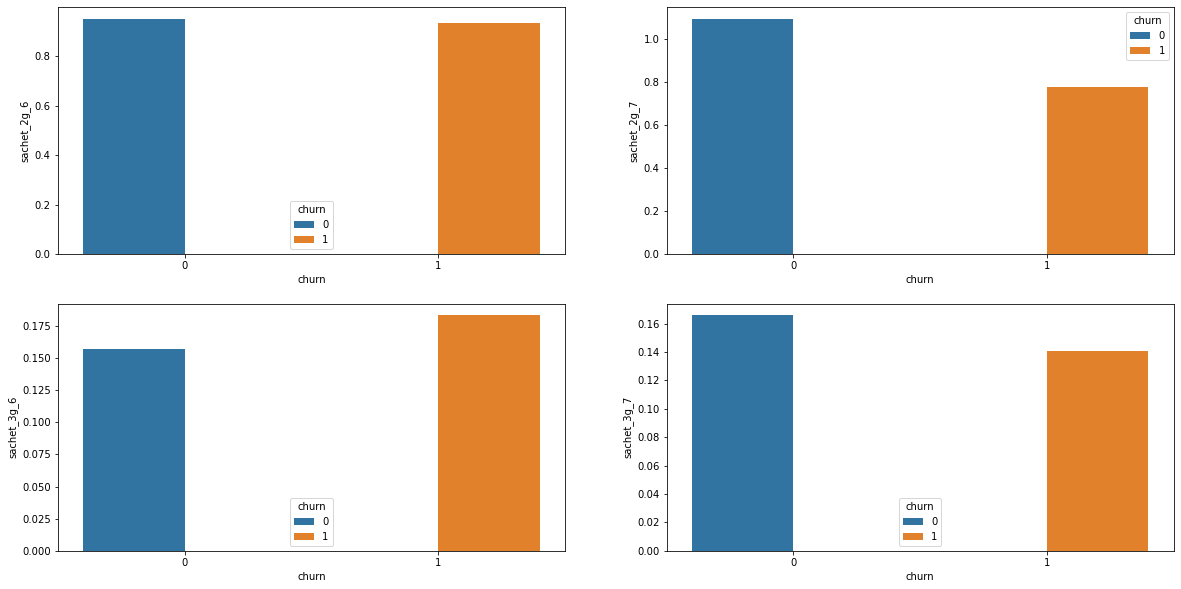

In [55]:
# Creating bar plot for 'sachet_2g' & 'sachet_3g'
plt.figure(figsize = (20,10))
sachet_2g_6_plot = plt.subplot(2, 2, 1)
sns.barplot(data = df, x = 'churn', y ='sachet_2g_6', hue = 'churn', ci = None)

sachet_2g_7_plot = plt.subplot(2, 2, 2)
sns.barplot(data = df, x = 'churn', y ='sachet_2g_7', hue = 'churn', ci = None)

sachet_3g_7_plot = plt.subplot(2, 2, 3)
sns.barplot(data = df, x = 'churn', y ='sachet_3g_6', hue = 'churn', ci = None)

sachet_3g_7_plot = plt.subplot(2, 2, 4)
sns.barplot(data = df, x = 'churn', y ='sachet_3g_7', hue = 'churn', ci = None)
plt.show()

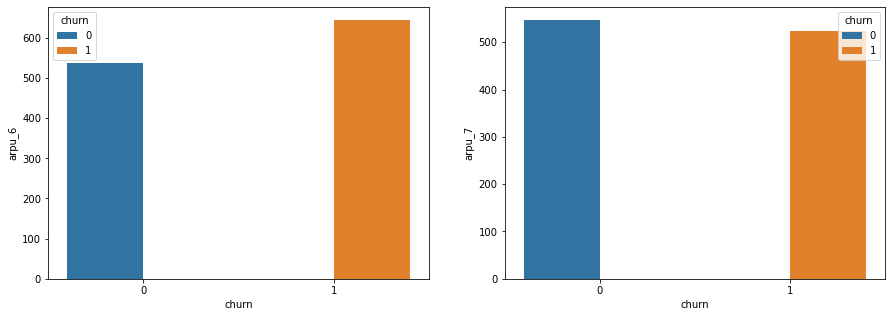

In [56]:
# Creating bar plot for 'arpu'
plt.figure(figsize = (15,5))
arpu_6_plot = plt.subplot(1, 2, 1)
sns.barplot(data = df, x = 'churn', y ='arpu_6', hue = 'churn', ci = None)

arpu_7_plot = plt.subplot(1, 2, 2)
sns.barplot(data = df, x = 'churn', y ='arpu_7', hue = 'churn', ci = None)
plt.show()

In [57]:
# Creating df containing minutes of usage
df_mou = df.iloc[:,3:-48]
df_mou.head()

,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
7,57.84,54.68,453.43,567.16,16.23,33.49,23.74,12.59,51.39,31.38,308.63,447.38,62.13,55.14,0.0,0.0,422.16,533.91,4.30,23.29,49.89,31.76,6.66,20.08,60.86,75.14,0.0,0.18,4.5,0.0,0.0,0.0,487.53,609.24,58.14,32.26,217.56,221.49,152.16,101.46,427.88,355.23,36.89,11.83,91.44,126.99,52.19,34.24,180.54,173.08,626.46,558.04,0.21,0.0,2.06,14.53
8,413.69,351.03,94.66,80.63,0.00,0.00,0.00,0.00,297.13,217.59,80.96,70.58,0.00,0.00,0.0,0.0,378.09,288.18,116.56,133.43,13.69,10.04,0.00,0.00,130.26,143.48,0.0,0.00,0.0,0.0,0.0,0.0,508.36,431.66,23.84,9.84,57.58,13.98,0.00,0.00,81.43,23.83,0.00,0.58,22.43,4.08,0.00,0.00,22.43,4.66,103.86,28.49,0.00,0.0,0.00,0.00
21,102.41,132.11,757.93,896.68,0.00,0.00,0.00,0.00,4.48,6.16,91.81,87.93,0.75,0.00,0.0,0.0,97.04,94.09,97.93,125.94,665.36,808.74,0.00,0.00,763.29,934.69,0.0,0.00,0.0,0.0,0.0,0.0,860.34,1028.79,2.48,10.19,118.23,74.63,4.61,2.84,125.33,87.68,14.06,5.98,67.69,38.23,0.00,0.00,81.76,44.21,207.09,131.89,0.00,0.0,0.00,0.00
23,48.96,50.66,85.41,89.36,0.00,0.00,0.00,0.00,48.96,50.66,82.94,83.01,0.00,0.00,0.0,0.0,131.91,133.68,0.00,0.00,2.36,6.35,0.00,0.00,2.36,6.35,0.0,0.01,0.1,0.0,0.0,0.0,134.38,140.04,20.71,61.04,95.91,113.36,0.00,0.00,116.63,174.41,0.51,0.00,2.43,14.89,0.00,0.00,2.94,14.89,119.58,222.89,0.00,0.0,0.00,28.23


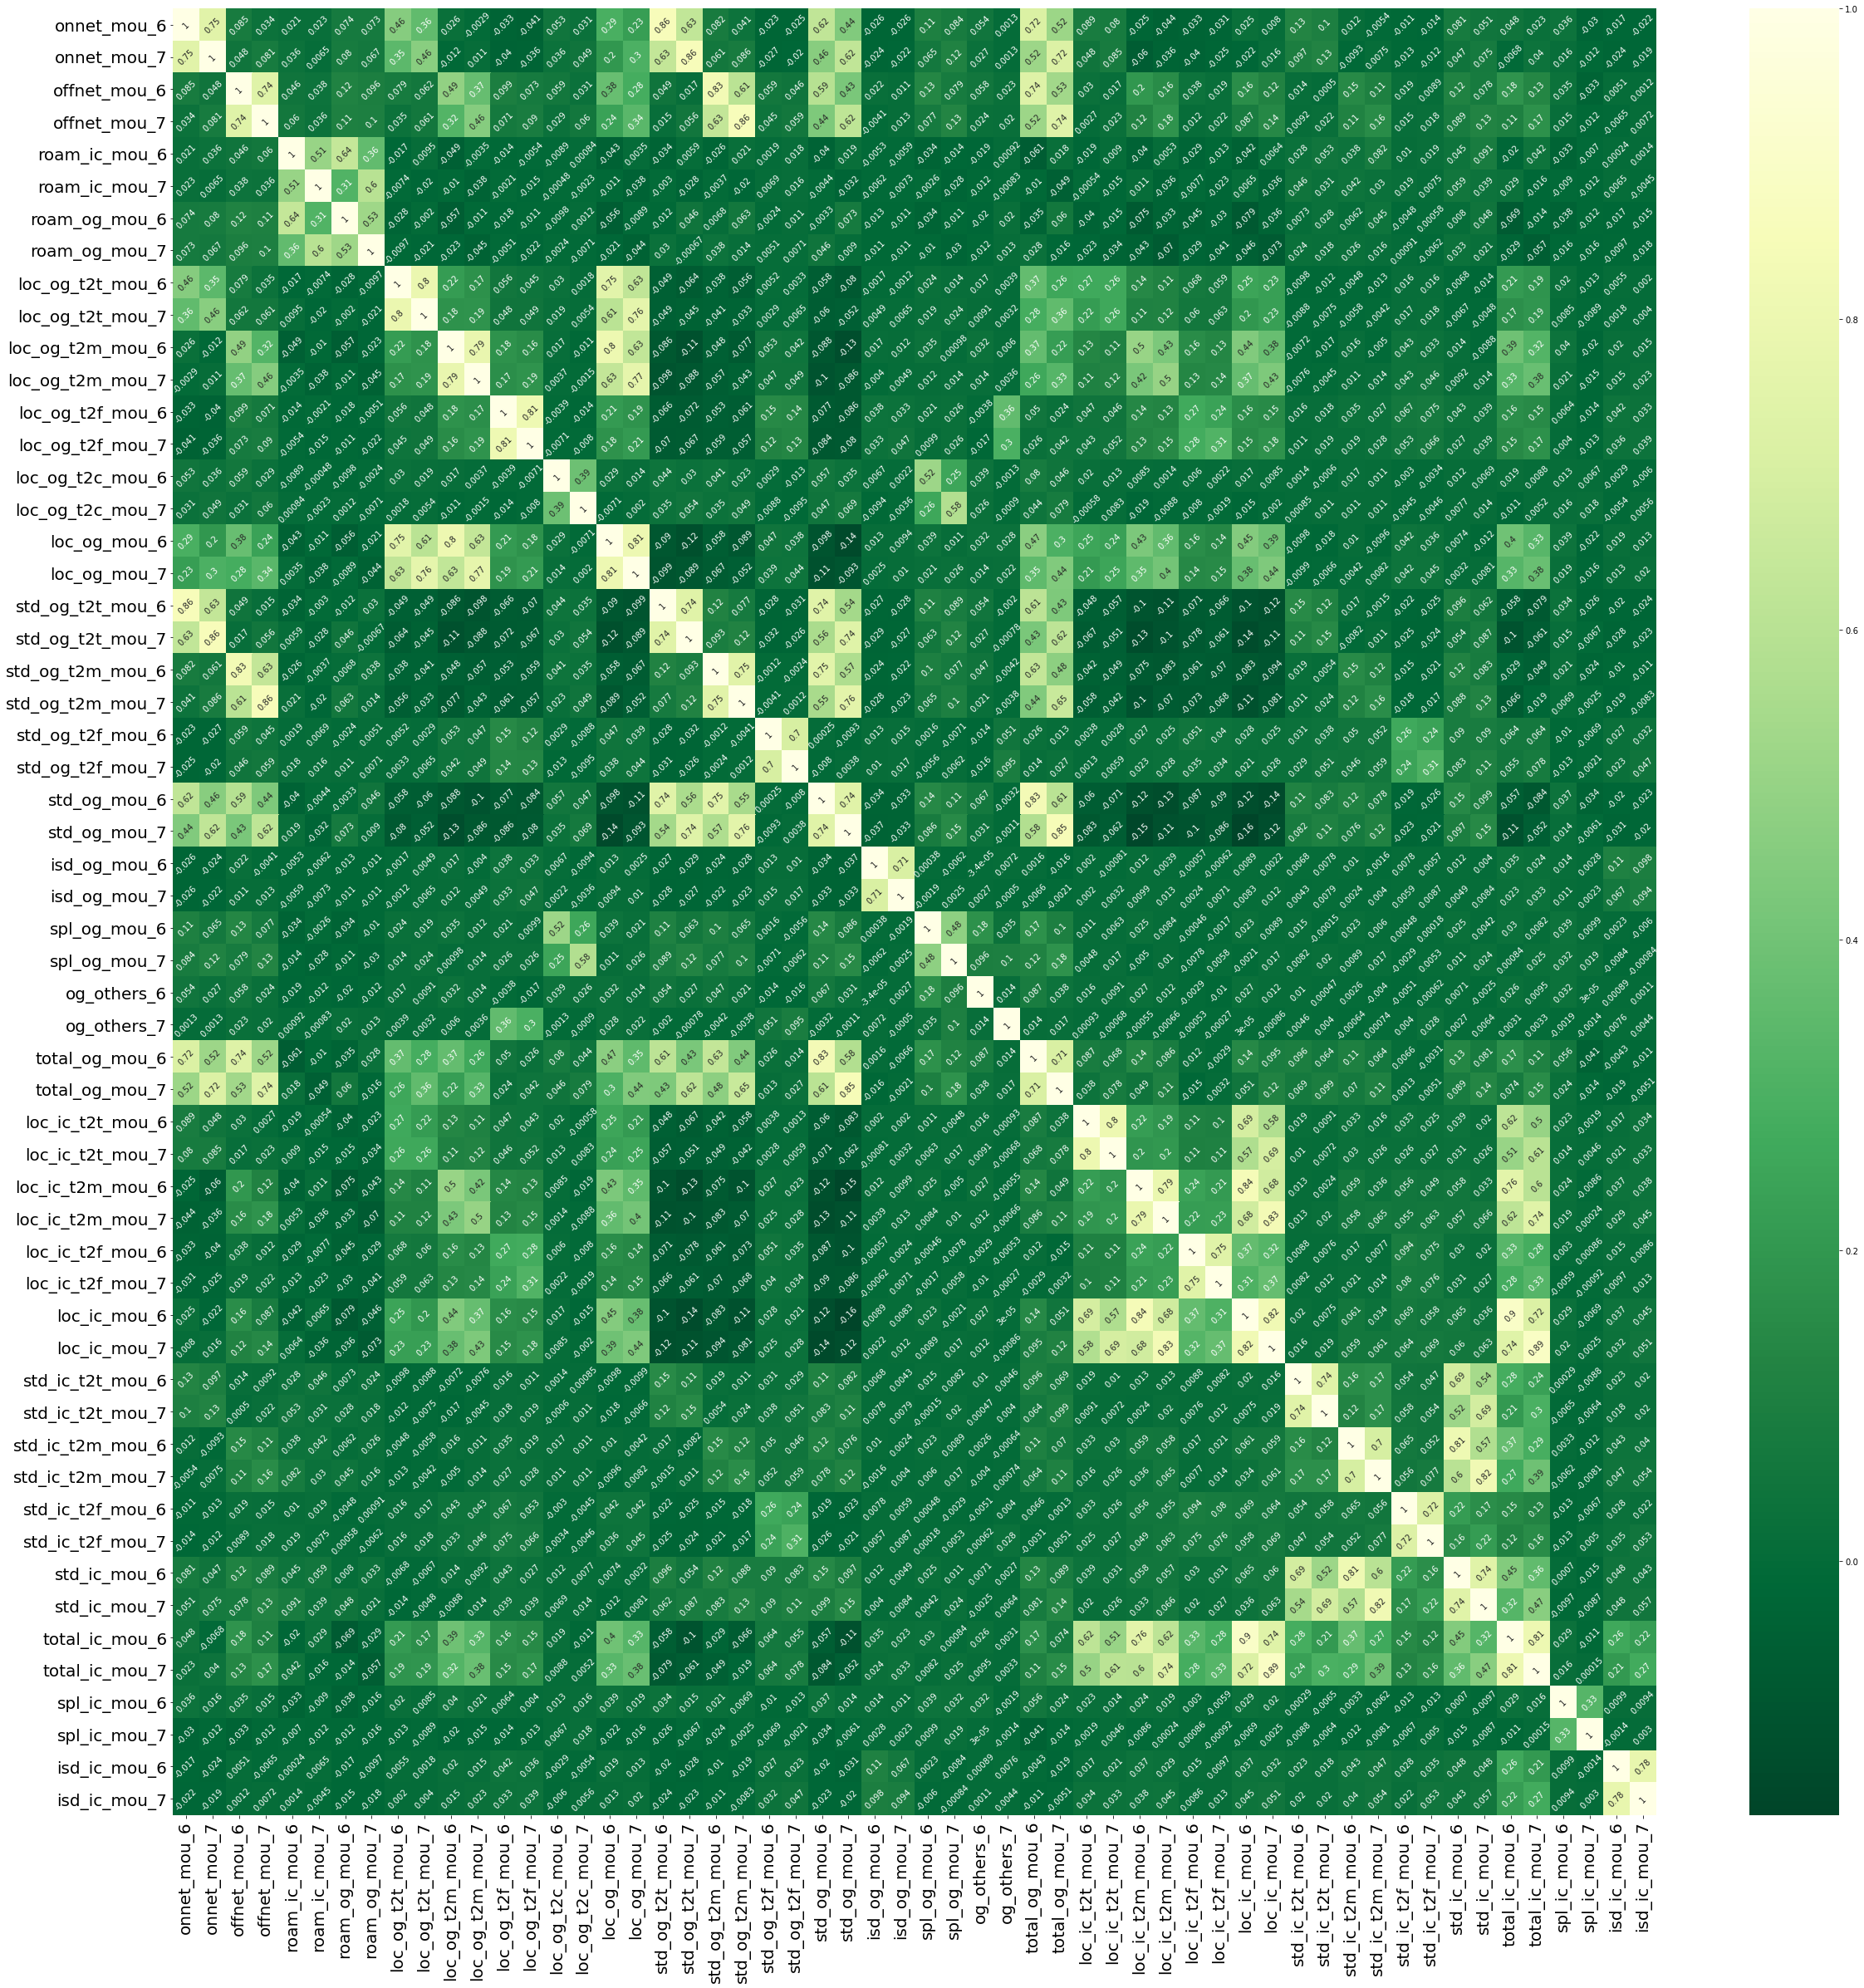

In [58]:
plt.figure(figsize = (40,40))
sns.heatmap(df_mou.corr(), annot = True, cmap = 'YlGn_r', annot_kws = {'size' : 10, 'rotation' : 45})
plt.yticks(fontsize = 20, rotation = 0)
plt.xticks(fontsize = 20, rotation = 90)
plt.show()

In [59]:
# Correlation for minutes of usage
df_mou.corr()

,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7
onnet_mou_6,1.000000,0.746896,0.085192,0.034283,0.020990,0.022535,0.073944,0.072807,0.457996,0.357434,0.025880,-0.002912,-0.033108,-0.041207,0.052849,0.031495,0.293125,0.225513,0.857352,0.631519,0.082187,0.040525,-0.022935,-0.024825,0.624634,0.442845,-0.026010,-0.026061,0.105610,0.084380,0.054255,0.001328,0.716627,0.517117,0.088996,0.080424,-0.024841,-0.043682,-0.032720,-0.031039,0.024674,0.007969,0.130953,0.101741,0.011705,-0.005416,-0.011432,-0.013779,0.081008,0.051446,0.048371,0.022757,0.036413,-0.030351,-0.017040,-0.021801
onnet_mou_7,0.746896,1.000000,0.048218,0.080885,0.035800,0.006486,0.080465,0.066781,0.345204,0.464247,-0.011560,0.010796,-0.040242,-0.036375,0.035531,0.049206,0.199506,0.303276,0.634735,0.858739,0.060783,0.085508,-0.026613,-0.019632,0.462210,0.623106,-0.023605,-0.021552,0.064714,0.117788,0.027317,0.001330,0.520147,0.720529,0.048381,0.084712,-0.060055,-0.036348,-0.040325,-0.025253,-0.022136,0.016210,0.097196,0.127111,-0.009269,0.007459,-0.012992,-0.012347,0.046683,0.075060,-0.006807,0.039781,0.016472,-0.011694,-0.024465,-0.019376
offnet_mou_6,0.085192,0.048218,1.000000,0.736738,0.046031,0.038405,0.117965,0.096255,0.078784,0.062082,0.487731,0.372421,0.098808,0.073346,0.059425,0.031169,0.375938,0.283431,0.048958,0.016707,0.831202,0.608541,0.059087,0.046302,0.592607,0.425057,0.021783,0.011328,0.133592,0.079436,0.058103,0.022836,0.736013,0.532465,0.029679,0.016710,0.199069,0.157408,0.038113,0.018525,0.159278,0.120250,0.014250,0.000504,0.146177,0.107592,0.019220,0.008891,0.115082,0.078185,0.182720,0.134184,0.035458,-0.033142,0.005144,0.001192
offnet_mou_7,0.034283,0.080885,0.736738,1.000000,0.059949,0.035812,0.108692,0.101707,0.035263,0.061186,0.322232,0.455907,0.070707,0.089858,0.028711,0.060351,0.238504,0.337447,0.015009,0.055528,0.632419,0.857659,0.044653,0.059192,0.436098,0.619997,-0.004145,0.012583,0.076826,0.127776,0.023579,0.020306,0.519391,0.736856,0.002741,0.023065,0.120330,0.183319,0.011942,0.021619,0.086743,0.141974,0.009232,0.022488,0.114911,0.155859,0.014694,0.018140,0.089292,0.126168,0.107577,0.173115,0.015019,-0.011547,-0.006462,0.007207
roam_ic_mou_6,0.020990,0.035800,0.046031,0.059949,1.000000,0.508172,0.639664,0.361074,-0.016507,0.009524,-0.049419,-0.003538,-0.013584,-0.005367,-0.008882,0.000837,-0.043476,0.003535,-0.034166,0.005864,-0.026055,0.021458,0.001854,0.017730,-0.040190,0.018789,-0.005294,-0.005926,-0.033762,-0.014181,-0.018509,0.000921,-0.060639,0.018151,-0.018963,0.008989,-0.040361,0.005345,-0.028762,-0.013177,-0.042062,0.006426,0.028234,0.053179,0.038313,0.081623,0.010181,0.018612,0.044769,0.090519,-0.019571,0.042227,-0.033283,-0.007008,0.000239,0.001407
roam_ic_mou_7,0.022535,0.006486,0.038405,0.035812,0.508172,1.000000,0.313686,0.596828,-0.007385,-0.019862,-0.010218,-0.038070,-0.002087,-0.015149,-0.000481,-0.002254,-0.011357,-0.038114,-0.003022,-0.027929,-0.003715,-0.020127,0.006900,0.016038,-0.004369,-0.031727,-0.006207,-0.007279,-0.002640,-0.028343,-0.012356,-0.000832,-0.010439,-0.049457,-0.000544,-0.014746,0.011353,-0.035853,-0.007703,-0.023025,0.006508,-0.036150,0.046283,0.030532,0.041665,0.029737,0.019047,0.007527,0.058631,0.039341,0.029248,-0.01593

We see lots of high correlation in minutes of usage data. We will drop the values with high correlation

In [60]:
# Dropping columns with high correlations
df = df.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7', 'loc_og_mou_6','loc_og_mou_7','std_og_t2m_mou_6', 'std_og_t2m_mou_7',
             'std_og_mou_6','std_og_mou_7','total_og_mou_6','total_og_mou_7'], axis =1)

In [61]:
df.shape

(28868, 97)

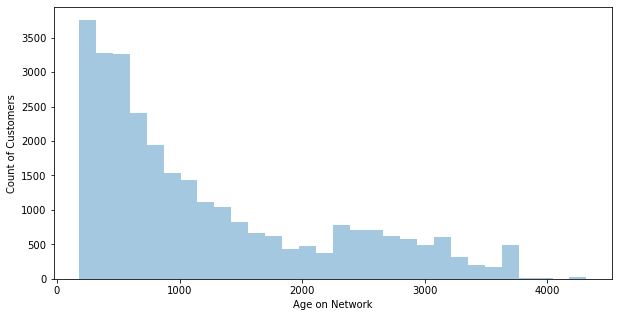

In [62]:
# Plotting distplot for 'aon'
plt.figure(figsize = (10,5))
aon_plot = sns.distplot(df['aon'], hist = True, bins = 30, kde = False)
aon_plot.set_ylabel('Count of Customers')
aon_plot.set_xlabel('Age on Network')
plt.show()

### Modelling

In [63]:
# Defining X & y for modelling
y = df['churn']
X = df.drop(['churn','mobile_number'], axis=1)

In [64]:
# Checking target variable 'churn'
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [65]:
# Checking features
X.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,jul_vbc_3g,jun_vbc_3g,total_revenue_6,total_revenue_7,avg_revenue_6_7,revenue_compare_8
0,197.385,214.816,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,4,3,362,252,252,252,252,252,1.0,1.0,252.0,252.0,0.0,0.0,1.0,1.0,252.0,252.0,30.13,1.32,83.57,150.76,212.17,212.17,212.17,212.17,0.0,0.0,0,0,0,0,1,1,0,0,1.0,1.0,968,0.00,101.20,614.0,504.0,559.0,-55.0
7,1069.180,1349.850,57.84,54.68,453.43,567.16,16.23,33.49,23.74,12.59,51.39,31.38,308.63,447.38,62.13,55.14,0.0,0.0,6.66,20.08,0.0,0.18,4.5,0.0,0.0,0.0,58.14,32.26,217.56,221.49,152.16,101.46,427.88,355.23,36.89,11.83,91.44,126.99,52.19,34.24,180.54,173.08,626.46,558.04,0.21,0.0,2.06,14.53,15.74,15.19,5,5,1580,790,1580,790,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,0,0,0,0,0,0,0,0,0.0,0.0,802,19.38,18.74,1580.0,790.0,1185.0,2453.0
8,378.721,492.223,413.69,351.03,94.66,80.63,0.00,0.00,0.00,0.00,297.13,217.59,80.96,70.58,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,23.84,9.84,57.58,13.98,0.00,0.00,81.43,23.83,0.00,0.58,22.43,4.08,0.00,0.00,22.43,4.66,103.86,28.49,0.00,0.0,0.00,0.00,0.00,0.00,19,21,437,601,90,154,50,0,0.0,2.0,0.0,154.0,0.0,2.0,0.0,0.0,0.0,177.0,0.00,356.00,0.00,750.95,0.00,0.00,0.00,0.00,-1.0,0.0,0,1,0,1,0,0,0,0,0.0,1.0,315,910.65,122.16,437.0,955.0,696.0,-369.0
21,514.453,597.753,102.41,132.11,757.93,896.68,0.00,0.00,0.00,0.00,4.48,6.16,91.81,87.93,0.75,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,2.48,10.19,118.23,74.63,4.61,2.84,125.33,87.68,14.06,5.98,67.69,38.23,0.00,0.00,81.76,44.21,207.09,131.89,0.00,0.0,0.00,0.00,0.00,0.00,22,26,600,680,50,50,30,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,0,0,0,0,0,0,0,0,0.0,0.0,720,0.00,0.00,600.0,680.0,640.0,78.0
23,74.350,193.897,48.96,50.66,85.41,89.36,0.00,0.00,0.00,0.00,48.96,50.66,82.94,83.01,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.01,0.1,0.0,0.0,0.0,20.71,61.04,95.91,113.36,0.00,0.00,116.63,174.41,0.51,0.00,2.43,14.89,0.00,0.00,2.94,14.89,119.58,222.89,0.00,0.0,0.00,28.23,0.00,5.35,3,5,0,454,0,179,0,179,0.0,2.0,0.0,179.0,0.0,0.0,0.0,2.0,0.0,356.0,0.00,0.48,0.00,599.09,0.00,306.57,0.00,301.78,-1.0,0.0,0,0,0,0,0,2,0,0,0.0,1.0,604,51.86,0.00,0.0,1166.0,583.0,396.0


In [66]:
# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [67]:
# Checking shape of train set
X_train.shape

(20207, 95)

In [68]:
# Checking shape of test set
X_test.shape

(8661, 95)

In [69]:
# Scaling the dataset
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [70]:
# Checking the scaled train dataset
X_train.describe()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,jul_vbc_3g,jun_vbc_3g,total_revenue_6,total_revenue_7,avg_revenue_6_7,revenue_compare_8
count,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04,2.020700e+04
mean,-2.543838e-17,-2.736645e-16,-1.934388e-17,-7.796752e-17,-1.205081e-16,-7.890017e-17,2.461973e-17,3.760622e-16,3.587608e-16,2.637515e-17,3.148754e-17,1.565751e-16,-5.062127e-17,-2.409778e-17,1.869473e-16,2.325963e-16,-6.638867e-16,-2.573094e-16,6.494752e-16,2.656882e-17,2.952830e-16,3.502694e-16,4.204777e-16,-2.965137e-16,-3.000369e-16,1.180805e-15,8.307305e-18,-1.694633e-17,1.162940e-16,-1.711459e-17,6.663426e-17,-3.730376e-16,-6.948990e-17,-1.352084e-17,-6.777363e-16,-3.376216e-18,-9.547989e-16,-6.026505e-17,5.307390e-16,5.797752e-16,6.287207e-16,-7.656665e-17,2.013450e-16,3.086738e-18,-5.032678e-16,-4.318027e-16,-1.788213e-16,-2.573232e-16,6.393102e-16,4.722060e-16,-4.503087e-17,-2.157042e-17,-2.392746e-18,-7.782811e-17,-2.508097e-16,1.303799e-16,-2.817451e-17,-1.640748e-16,1.896450e-16,-4.489901e-17,3.535783e-16,8.251731e-16,-9.392310e-16,-3.688290e-16,-9.879979e-16,-2.367802e-15,-5.748336e-16,1.199032e-15,6.383082e-16,-3.208340e-16,4.553668e-16,8.266318e-16,-2.249593e-16,1.876396e-16,-3.425198e-16,-1.337619e-15,1.176561e-15,-4.607368e-16,3.674719e-16,8.086931e-16,-1.460426e-16,7.281474e-16,5.651330e-16,4.967763e-16,2.052058e-15,2.673370e-15,1.716513e-16,-1.112443e-15,1.544365e-17,-1.638715e-16,1.842139e-16,1.078961e-16,4.450342e-17,-7.330428e-17,2.264180e-17
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.00002

In [71]:
# Checking the scaled test dataset
X_test.describe()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,jul_vbc_3g,jun_vbc_3g,total_revenue_6,total_revenue_7,avg_revenue_6_7,revenue_compare_8
count,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000
mean,-0.005139,0.018870,-0.001361,0.014775,-0.021773,-0.018249,-0.005332,-0.000855,-0.003046,0.002997,-0.017672,-0.010572,-0.008952,0.002229,-0.015865,-0.011870,-0.001858,0.015821,0.017824,-0.006611,-0.010488,-0.001305,-0.006660,0.002857,0.009112,-0.004070,-0.003292,0.001589,0.017855,0.016644,0.013001,-0.011782,0.012505,0.010436,-0.014701,-0.005858,-0.002098,0.002319,-0.009737,-0.001223,-0.010914,-0.001776,0.004092,0.006223,-0.004418,0.007394,-0.014804,-0.012465,0.030179,0.019022,-0.015345,-0.009383,-0.000514,0.012007,0.012558,0.009323,-0.002549,0.001526,-0.001948,-0.003744,-0.001135,0.005007,-0.000752,-0.010099,-0.003526,0.016968,-0.002150,0.011073,0.013641,0.001590,-0.006975,0.004258,-0.012976,0.003866,-0.011129,0.004621,-0.020074,-0.015039,0.017727,0.021030,-0.004280,-0.014090,-0.015622,0.009820,0.007946,0.013662,-0.013924,-0.006007,-0.025511,-0.004933,0.005219,0.006438,0.011397,0.011509,-0.018815
std,0.994771,0.988665,0.997508,1.022708,0.948788,0.932563,0.898625,0.931297,0.979988,1.029519,0.903795,0.944105,0.929331,0.967784,0.802401,0.819911,1.160862,1.351264,1.128042,0.993691,0.809643,0.842797,1.022493,0.885244,3.021384,0.331491,1.006336,0.946757,0.991082,0.971070,1.139398,0.939047,1.003817,0.959657,1.111021,1.082920,0.965044,1.085473,0.917887,1.106195,0.985632,1.043875,0.989342,0.974755,1.660190,0.974823,0.716705,0.777951,2.367951,1.794999,0.939020,0.977582,1.007800,0.994947,1.065414,1.035518,1.056710,0.989546,1.046204,1.013316,0.984843,0.974677,1.020085,

In [74]:
# Performing SMOTE on train dataset
counter = Counter(y_train)
print("Before SMOTE: ", counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter1 = Counter(y_train_sm)
print("After SMOTE: ", counter1)

Before SMOTE:  Counter({0: 18554, 1: 1653})
After SMOTE:  Counter({0: 18554, 1: 18554})


In [75]:
# Creating Logistic Regression model
logreg = LogisticRegression()

In [76]:
# Performing RFE for 20 best variables
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_sm,y_train_sm)

In [77]:
# Checking the predictors after performing RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 2),
 ('arpu_7', True, 1),
 ('onnet_mou_6', False, 34),
 ('onnet_mou_7', False, 35),
 ('offnet_mou_6', False, 33),
 ('offnet_mou_7', False, 32),
 ('roam_ic_mou_6', False, 63),
 ('roam_ic_mou_7', False, 65),
 ('roam_og_mou_6', False, 36),
 ('roam_og_mou_7', True, 1),
 ('loc_og_t2t_mou_6', False, 68),
 ('loc_og_t2t_mou_7', False, 12),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2f_mou_6', False, 54),
 ('loc_og_t2f_mou_7', False, 10),
 ('loc_og_t2c_mou_6', False, 16),
 ('loc_og_t2c_mou_7', False, 58),
 ('std_og_t2f_mou_6', False, 41),
 ('std_og_t2f_mou_7', False, 29),
 ('isd_og_mou_6', False, 75),
 ('isd_og_mou_7', False, 24),
 ('spl_og_mou_6', False, 73),
 ('spl_og_mou_7', False, 31),
 ('og_others_6', False, 37),
 ('og_others_7', False, 11),
 ('loc_ic_t2t_mou_6', False, 55),
 ('loc_ic_t2t_mou_7', True, 1),
 ('loc_ic_t2m_mou_6', False, 56),
 ('loc_ic_t2m_mou_7', False, 74),
 ('loc_ic_t2f_mou_6', False, 47),
 ('loc_ic_t2f_mou_7', False, 67),

In [78]:
# Creating column with top 20 variables chosen by RFE
col = X_train.columns[rfe.support_]

In [79]:
# Checking the features after performing RFE
col

Index(['arpu_7', 'roam_og_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_ic_t2t_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_mou_7', 'total_ic_mou_6', 'max_rech_amt_7',
       'last_day_rch_amt_7', 'max_rech_data_6', 'av_rech_amt_data_6',
       'monthly_2g_7', 'aon', 'total_revenue_6', 'total_revenue_7',
       'avg_revenue_6_7', 'revenue_compare_8'],
      dtype='object')

In [80]:
# Creating new train set
X_new_train = X_train[col]

In [81]:
# Performing SMOTE on new train dataset
counter = Counter(y_train)
print("Before SMOTE: ", counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_new_train, y_train)
counter1 = Counter(y_train_sm)
print("After SMOTE: ", counter1)

Before SMOTE:  Counter({0: 18554, 1: 1653})
After SMOTE:  Counter({0: 18554, 1: 18554})


In [82]:
# Creating model with new train data set
new_logreg = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family = sm.families.Binomial())
new_model = new_logreg.fit()

In [83]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37108
Model:                            GLM   Df Residuals:                    37088
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17054.
Date:                Wed, 30 Jun 2021   Deviance:                       34108.
Time:                        11:21:51   Pearson chi2:                 1.69e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4002      0.022    -63.285      0.000      -1.444      -1.357
arpu_7                 0.6147      0.023     26.199      0.000       0.569       0.661
roam_og_mou_7          0.2353      0.013     17.954      0.000       0.210       0.261
loc_og_t2m_mou_6      -0.1351      0.030     -4.485      0.000      -0.194      -0.076
loc_og_t2m_mou_7      -0.3486      0.034    -10.198      0.000      -0.416      -0.282
loc_ic_t2t_mou_7      -0.2723      0.036     -7.565      0.000      -0.343      -0.202
loc_ic_mou_7          -0.3570      0.035    -10.248      0.000      -0.425      -0.289
std_ic_t2t_mou_7       0.2742      0.098      2.806      0.005       0.083       0.466
std_ic_t2m_mou_7       0.1445      0.126      1.146      0.252      -0.103       0.391
std_ic_mou_7          -0.5418      0.173     -3.132      0.002      -0.881      -0.203
total_ic_mou_6         0.2942      0.027     10.739      0.000       0.241       0.348
max_rech_amt_7         0.1126      0.019      6.062      0.000       0.076       0.149
last_day_rch_amt_7    -0.1891      0.019    -10.154      0.000      -0.226      -0.153
max_rech_data_6        0.4575      0.037     12.505      0.000       0.386       0.529
av_rech_amt_data_6    -0.5604      0.046    -12.163      0.000      -0.651      -0.470
monthly_2g_7          -0.3786      0.018    -20.575      0.000      -0.415      -0.343
aon                   -0.4228      0.016    -25.905      0.000      -0.455      -0.391
total_revenue_6       -0.1871      0.021     -8.782      0.000      -0.229      -0.145
total_revenue_7       -0.7667      0.018    -43.100      0.000      -0.802      -0.732
avg_revenue_6_7       -0.6233      0.015    -40.414      0.000      -0.654      -0.593
revenue_compare_8     -2.0901      0.028    -73.847      0.000      -2.146      -2.035
======================================================================================
"""

In [84]:
# Checking multi-collinearity in the dataset
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_revenue_6,inf
18,avg_revenue_6_7,inf
17,total_revenue_7,inf
8,std_ic_mou_7,75.53
7,std_ic_t2m_mou_7,33.69
6,std_ic_t2t_mou_7,31.76
13,av_rech_amt_data_6,9.25
12,max_rech_data_6,6.15
5,loc_ic_mou_7,4.08
3,loc_og_t2m_mou_7,3.52


Dropping highly correlated variable 'avg_revenue_6_7'

In [85]:
col = col.drop('avg_revenue_6_7',1)

In [86]:
# Creating new train set
X_new_train = X_train[col]

In [87]:
# Performing SMOTE on new train dataset
counter = Counter(y_train)
print("Before SMOTE: ", counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_new_train, y_train)
counter1 = Counter(y_train_sm)
print("After SMOTE: ", counter1)

Before SMOTE:  Counter({0: 18554, 1: 1653})
After SMOTE:  Counter({0: 18554, 1: 18554})


In [88]:
# Creating model with new train data set
new_logreg = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family = sm.families.Binomial())
new_model = new_logreg.fit()

In [89]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37108
Model:                            GLM   Df Residuals:                    37088
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17128.
Date:                Wed, 30 Jun 2021   Deviance:                       34257.
Time:                        11:22:20   Pearson chi2:                 1.06e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3856      0.022    -63.006      0.000      -1.429      -1.342
arpu_7                 0.6063      0.023     25.950      0.000       0.560       0.652
roam_og_mou_7          0.2493      0.013     19.065      0.000       0.224       0.275
loc_og_t2m_mou_6      -0.1558      0.030     -5.127      0.000      -0.215      -0.096
loc_og_t2m_mou_7      -0.2970      0.034     -8.755      0.000      -0.363      -0.230
loc_ic_t2t_mou_7      -0.2488      0.037     -6.799      0.000      -0.320      -0.177
loc_ic_mou_7          -0.4127      0.036    -11.457      0.000      -0.483      -0.342
std_ic_t2t_mou_7       0.3719      0.104      3.590      0.000       0.169       0.575
std_ic_t2m_mou_7       0.2533      0.133      1.902      0.057      -0.008       0.514
std_ic_mou_7          -0.6926      0.184     -3.767      0.000      -1.053      -0.332
total_ic_mou_6         0.3078      0.027     11.402      0.000       0.255       0.361
max_rech_amt_7         0.1323      0.019      7.132      0.000       0.096       0.169
last_day_rch_amt_7    -0.1861      0.018    -10.097      0.000      -0.222      -0.150
max_rech_data_6        0.4662      0.037     12.743      0.000       0.395       0.538
av_rech_amt_data_6    -0.5801      0.046    -12.580      0.000      -0.671      -0.490
monthly_2g_7          -0.3591      0.018    -19.814      0.000      -0.395      -0.324
aon                   -0.4280      0.016    -26.333      0.000      -0.460      -0.396
total_revenue_6       -0.5602      0.028    -19.709      0.000      -0.616      -0.504
total_revenue_7       -1.1927      0.025    -47.121      0.000      -1.242      -1.143
revenue_compare_8     -2.0722      0.028    -73.540      0.000      -2.127      -2.017
======================================================================================
"""

In [88]:
# Checking multi-collinearity in the dataset
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,av_rech_amt_data_6,12.62
8,max_rech_data_6,7.99
16,total_revenue_6,5.14
17,total_revenue_7,4.72
13,sachet_2g_7,3.48
1,arpu_7,3.25
0,arpu_6,3.17
10,arpu_2g_7,2.47
11,night_pck_user_7,2.20
6,max_rech_amt_7,1.83


Dropping highly correlated variable 'av_rech_amt_data_6'

In [91]:
col = col.drop('av_rech_amt_data_6',1)

In [92]:
# Creating new train set
X_new_train = X_train[col]

In [93]:
# Performing SMOTE on new train dataset
counter = Counter(y_train)
print("Before SMOTE: ", counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_new_train, y_train)
counter1 = Counter(y_train_sm)
print("After SMOTE: ", counter1)

Before SMOTE:  Counter({0: 18554, 1: 1653})
After SMOTE:  Counter({0: 18554, 1: 18554})


In [94]:
# Creating model with new train data set
new_logreg = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family = sm.families.Binomial())
new_model = new_logreg.fit()

In [95]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37108
Model:                            GLM   Df Residuals:                    37089
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17278.
Date:                Wed, 30 Jun 2021   Deviance:                       34555.
Time:                        11:24:45   Pearson chi2:                 1.59e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3615      0.022    -62.601      0.000      -1.404      -1.319
arpu_7                 0.7236      0.021     33.723      0.000       0.682       0.766
roam_og_mou_7          0.2434      0.013     18.412      0.000       0.217       0.269
loc_og_t2m_mou_6      -0.0505      0.030     -1.707      0.088      -0.109       0.007
loc_og_t2m_mou_7      -0.3959      0.034    -11.580      0.000      -0.463      -0.329
loc_ic_t2t_mou_7      -0.2733      0.036     -7.563      0.000      -0.344      -0.202
loc_ic_mou_7          -0.4036      0.035    -11.573      0.000      -0.472      -0.335
std_ic_t2t_mou_7       0.3993      0.101      3.941      0.000       0.201       0.598
std_ic_t2m_mou_7       0.2953      0.130      2.264      0.024       0.040       0.551
std_ic_mou_7          -0.7407      0.180     -4.112      0.000      -1.094      -0.388
total_ic_mou_6         0.3362      0.027     12.359      0.000       0.283       0.390
max_rech_amt_7         0.1395      0.018      7.655      0.000       0.104       0.175
last_day_rch_amt_7    -0.1996      0.018    -10.847      0.000      -0.236      -0.164
max_rech_data_6        0.0892      0.016      5.697      0.000       0.059       0.120
monthly_2g_7          -0.3807      0.018    -21.060      0.000      -0.416      -0.345
aon                   -0.4388      0.016    -26.964      0.000      -0.471      -0.407
total_revenue_6       -0.7850      0.022    -36.129      0.000      -0.828      -0.742
total_revenue_7       -1.2125      0.024    -49.636      0.000      -1.260      -1.165
revenue_compare_8     -2.0554      0.028    -73.767      0.000      -2.110      -2.001
======================================================================================
"""

In [96]:
# Checking multi-collinearity in the dataset
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,std_ic_mou_7,76.20
7,std_ic_t2m_mou_7,34.70
6,std_ic_t2t_mou_7,31.04
5,loc_ic_mou_7,4.06
3,loc_og_t2m_mou_7,3.51
2,loc_og_t2m_mou_6,3.03
9,total_ic_mou_6,2.81
4,loc_ic_t2t_mou_7,2.05
0,arpu_7,1.85
10,max_rech_amt_7,1.65


Dropping highly correlated variable 'std_ic_mou_7'

In [97]:
col = col.drop('std_ic_mou_7',1)

In [98]:
# Creating new train set
X_new_train = X_train[col]

In [99]:
# Performing SMOTE on new train dataset
counter = Counter(y_train)
print("Before SMOTE: ", counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_new_train, y_train)
counter1 = Counter(y_train_sm)
print("After SMOTE: ", counter1)

Before SMOTE:  Counter({0: 18554, 1: 1653})
After SMOTE:  Counter({0: 18554, 1: 18554})


In [100]:
# Creating model with new train data set
new_logreg = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family = sm.families.Binomial())
new_model = new_logreg.fit()

In [101]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37108
Model:                            GLM   Df Residuals:                    37090
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17026.
Date:                Wed, 30 Jun 2021   Deviance:                       34051.
Time:                        11:25:29   Pearson chi2:                 3.51e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4351      0.022    -63.915      0.000      -1.479      -1.391
arpu_7                 0.7758      0.022     35.242      0.000       0.733       0.819
roam_og_mou_7          0.2431      0.013     18.462      0.000       0.217       0.269
loc_og_t2m_mou_6      -0.0821      0.030     -2.765      0.006      -0.140      -0.024
loc_og_t2m_mou_7      -0.3638      0.033    -10.879      0.000      -0.429      -0.298
loc_ic_t2t_mou_7      -0.2337      0.036     -6.520      0.000      -0.304      -0.163
loc_ic_mou_7          -0.4530      0.036    -12.535      0.000      -0.524      -0.382
std_ic_t2t_mou_7      -0.0263      0.017     -1.550      0.121      -0.059       0.007
std_ic_t2m_mou_7      -0.2373      0.021    -11.257      0.000      -0.279      -0.196
total_ic_mou_6         0.3424      0.027     12.483      0.000       0.289       0.396
max_rech_amt_7         0.0914      0.019      4.929      0.000       0.055       0.128
last_day_rch_amt_7    -0.1755      0.019     -9.386      0.000      -0.212      -0.139
max_rech_data_6        0.0710      0.016      4.452      0.000       0.040       0.102
monthly_2g_7          -0.3662      0.018    -20.179      0.000      -0.402      -0.331
aon                   -0.4374      0.016    -26.658      0.000      -0.470      -0.405
total_revenue_6       -0.8530      0.022    -38.264      0.000      -0.897      -0.809
total_revenue_7       -1.2863      0.025    -50.921      0.000      -1.336      -1.237
revenue_compare_8     -2.1664      0.029    -75.119      0.000      -2.223      -2.110
======================================================================================
"""

In [102]:
# Checking multi-collinearity in the dataset
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_7,4.08
3,loc_og_t2m_mou_7,3.51
2,loc_og_t2m_mou_6,3.06
8,total_ic_mou_6,2.83
4,loc_ic_t2t_mou_7,2.05
0,arpu_7,1.88
9,max_rech_amt_7,1.70
10,last_day_rch_amt_7,1.58
15,total_revenue_7,1.51
14,total_revenue_6,1.44


In [102]:
# Creating new train set
X_new_train = X_train[col]

In [103]:
# Performing SMOTE on new train dataset
counter = Counter(y_train)
print("Before SMOTE: ", counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_new_train, y_train)
counter1 = Counter(y_train_sm)
print("After SMOTE: ", counter1)

Before SMOTE:  Counter({0: 18554, 1: 1653})
After SMOTE:  Counter({0: 18554, 1: 18554})


In [104]:
# Creating model with new train data set
new_logreg = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family = sm.families.Binomial())
new_model = new_logreg.fit()

In [103]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37108
Model:                            GLM   Df Residuals:                    37090
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17026.
Date:                Wed, 30 Jun 2021   Deviance:                       34051.
Time:                        11:27:56   Pearson chi2:                 3.51e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4351      0.022    -63.915      0.000      -1.479      -1.391
arpu_7                 0.7758      0.022     35.242      0.000       0.733       0.819
roam_og_mou_7          0.2431      0.013     18.462      0.000       0.217       0.269
loc_og_t2m_mou_6      -0.0821      0.030     -2.765      0.006      -0.140      -0.024
loc_og_t2m_mou_7      -0.3638      0.033    -10.879      0.000      -0.429      -0.298
loc_ic_t2t_mou_7      -0.2337      0.036     -6.520      0.000      -0.304      -0.163
loc_ic_mou_7          -0.4530      0.036    -12.535      0.000      -0.524      -0.382
std_ic_t2t_mou_7      -0.0263      0.017     -1.550      0.121      -0.059       0.007
std_ic_t2m_mou_7      -0.2373      0.021    -11.257      0.000      -0.279      -0.196
total_ic_mou_6         0.3424      0.027     12.483      0.000       0.289       0.396
max_rech_amt_7         0.0914      0.019      4.929      0.000       0.055       0.128
last_day_rch_amt_7    -0.1755      0.019     -9.386      0.000      -0.212      -0.139
max_rech_data_6        0.0710      0.016      4.452      0.000       0.040       0.102
monthly_2g_7          -0.3662      0.018    -20.179      0.000      -0.402      -0.331
aon                   -0.4374      0.016    -26.658      0.000      -0.470      -0.405
total_revenue_6       -0.8530      0.022    -38.264      0.000      -0.897      -0.809
total_revenue_7       -1.2863      0.025    -50.921      0.000      -1.336      -1.237
revenue_compare_8     -2.1664      0.029    -75.119      0.000      -2.223      -2.110
======================================================================================
"""

In [105]:
# Checking multi-collinearity in the dataset
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_7,4.08
3,loc_og_t2m_mou_7,3.51
2,loc_og_t2m_mou_6,3.06
8,total_ic_mou_6,2.83
4,loc_ic_t2t_mou_7,2.05
0,arpu_7,1.88
9,max_rech_amt_7,1.70
10,last_day_rch_amt_7,1.58
15,total_revenue_7,1.51
14,total_revenue_6,1.44


Dropping highly correlated variable 'loc_ic_mou_7'

In [106]:
col = col.drop('loc_ic_mou_7',1)

In [107]:
# Creating new train set
X_new_train = X_train[col]

In [108]:
# Performing SMOTE on new train dataset
counter = Counter(y_train)
print("Before SMOTE: ", counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_new_train, y_train)
counter1 = Counter(y_train_sm)
print("After SMOTE: ", counter1)

Before SMOTE:  Counter({0: 18554, 1: 1653})
After SMOTE:  Counter({0: 18554, 1: 18554})


In [109]:
# Creating model with new train data set
new_logreg = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family = sm.families.Binomial())
new_model = new_logreg.fit()

In [110]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37108
Model:                            GLM   Df Residuals:                    37092
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18938.
Date:                Wed, 30 Jun 2021   Deviance:                       37877.
Time:                        11:28:54   Pearson chi2:                 1.49e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9401      0.018    -53.334      0.000      -0.975      -0.906
arpu_7                 0.0996      0.016      6.168      0.000       0.068       0.131
roam_og_mou_7          0.2640      0.013     20.735      0.000       0.239       0.289
loc_og_t2m_mou_6       0.1047      0.027      3.815      0.000       0.051       0.158
loc_og_t2m_mou_7      -0.6061      0.032    -19.190      0.000      -0.668      -0.544
loc_ic_t2t_mou_7      -0.5298      0.033    -16.181      0.000      -0.594      -0.466
std_ic_t2t_mou_7       0.0134      0.015      0.906      0.365      -0.016       0.043
std_ic_t2m_mou_7      -0.2514      0.022    -11.582      0.000      -0.294      -0.209
total_ic_mou_6         0.1991      0.020      9.792      0.000       0.159       0.239
max_rech_amt_7         0.0209      0.018      1.183      0.237      -0.014       0.056
last_day_rch_amt_7    -0.2164      0.017    -12.408      0.000      -0.251      -0.182
max_rech_data_6       -0.0367      0.014     -2.579      0.010      -0.065      -0.009
monthly_2g_7          -0.4595      0.017    -26.605      0.000      -0.493      -0.426
aon                   -0.4036      0.015    -26.299      0.000      -0.434      -0.374
total_revenue_6       -0.5669      0.019    -30.007      0.000      -0.604      -0.530
revenue_compare_8     -1.5334      0.023    -67.899      0.000      -1.578      -1.489
======================================================================================
"""

In [111]:
# Checking multi-collinearity in the dataset
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_t2m_mou_7,2.96
2,loc_og_t2m_mou_6,2.85
7,total_ic_mou_6,1.86
8,max_rech_amt_7,1.68
9,last_day_rch_amt_7,1.58
0,arpu_7,1.51
13,total_revenue_6,1.42
4,loc_ic_t2t_mou_7,1.39
14,revenue_compare_8,1.30
10,max_rech_data_6,1.25


All variables have good VIF values, we will not drop any variables and start making predictions

In [112]:
# Making predictions on train set
y_train_pred = new_model.predict(sm.add_constant(X_train_sm)).values.reshape(-1)
y_train_pred[:10]

array([0.65158002, 0.05817716, 0.61481143, 0.72218357, 0.18073751,
       0.69200286, 0.12804275, 0.13235773, 0.0576608 , 0.18360942])

In [113]:
X_train_sm.shape

(37108, 15)

In [114]:
# Creating dataframe with actual churn and predicted probabilities
y_train_pred_final = pd.DataFrame({'Sr No' : X_train_sm.index, 'Churn':y_train_sm.values, 'Churn Probabilities':y_train_pred})
y_train_pred_final.head()

,Sr No,Churn,Churn Probabilities
0,0,0,0.651580
1,1,0,0.058177
2,2,1,0.614811
3,3,0,0.722184
4,4,0,0.180738


In [115]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Churn Probabilities'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Sr No,Churn,Churn Probabilities,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.651580,1,1,1,1,1,1,1,0,0,0
1,1,0,0.058177,1,0,0,0,0,0,0,0,0,0
2,2,1,0.614811,1,1,1,1,1,1,1,0,0,0
3,3,0,0.722184,1,1,1,1,1,1,1,1,0,0
4,4,0,0.180738,1,1,0,0,0,0,0,0,0,0


In [116]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.599736  0.983615  0.215856
0.2   0.2  0.667834  0.964752  0.370917
0.3   0.3  0.719521  0.930743  0.508300
0.4   0.4  0.755551  0.878517  0.632586
0.5   0.5  0.773229  0.801391  0.745068
0.6   0.6  0.765873  0.700496  0.831249
0.7   0.7  0.727633  0.554328  0.900938
0.8   0.8  0.610623  0.270023  0.951223
0.9   0.9  0.531880  0.081546  0.982214


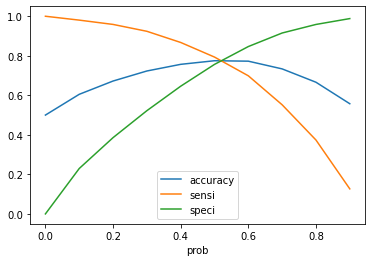

In [117]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph, we observe that 0.5 is the optimal cut off 

In [117]:
# Final predictions with 0.5 as optimal cutoff
y_train_pred_final['Final Predicted'] = y_train_pred_final['Churn Probabilities'].map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Sr No,Churn,Churn Probabilities,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Predicted
0,0,0,0.651580,1,1,1,1,1,1,1,0,0,0,1
1,1,0,0.058177,1,0,0,0,0,0,0,0,0,0,0
2,2,1,0.614811,1,1,1,1,1,1,1,0,0,0,1
3,3,0,0.722184,1,1,1,1,1,1,1,1,0,0,1
4,4,0,0.180738,1,1,0,0,0,0,0,0,0,0,0


In [118]:
# Making predictions on test set
X_new_test = X_test[col]
X_test.shape

(8661, 95)

In [119]:
# Creating model for test case
X_test_sm = sm.add_constant(X_new_test)
y_test_pred = new_model.predict(X_test_sm)

In [120]:
# Creating dataframe with test data churn and predicted probabilities
y_test_pred_final = pd.DataFrame({'Sr No' : X_test_sm.index, 'Churn':y_test.values, 'Churn Probabilities':y_test_pred})
y_test_pred_final.head()

,Sr No,Churn,Churn Probabilities
18445,18445,1,0.756718
68254,68254,0,0.263158
146,146,0,0.186853
20677,20677,1,0.708834
80638,80638,0,0.162198


In [121]:
# Final predictions on test dataset
y_test_pred_final['Final Predicted'] = y_test_pred_final['Churn Probabilities'].map( lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Sr No,Churn,Churn Probabilities,Final Predicted
18445,18445,1,0.756718,1
68254,68254,0,0.263158,0
146,146,0,0.186853,0
20677,20677,1,0.708834,1
80638,80638,0,0.162198,0


In [122]:
# Checking metrics for Logistic Regression model
metric_1 = []
print("Train Accuracy :", accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))
metric_1.append(accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))

print("Train Confusion Matrix:")
print(confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))


print("Train Precision Score: ")
print(precision_score(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))
metric_1.append(precision_score(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))

print("Train Recall Score: ")
print(recall_score(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))
metric_1.append(recall_score(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))

print("Train F1 Score: ")
print(f1_score(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))
metric_1.append(f1_score(y_train_pred_final['Churn'], y_train_pred_final['Final Predicted']))

print("-"*50)

print("Test Accuracy :", accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))
metric_1.append(accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))


print("Test Precision Score: ")
print(precision_score(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))
metric_1.append(precision_score(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))

print("Test Recall Score: ")
print(recall_score(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))
metric_1.append(recall_score(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))

print("Test F1 Score: ")
print(f1_score(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))
metric_1.append(f1_score(y_test_pred_final['Churn'], y_test_pred_final['Final Predicted']))

Train Accuracy : 0.773229492292767
Train Confusion Matrix:
[[13824  4730]
 [ 3685 14869]]
Train Precision Score: 
0.7586611561814378
Train Recall Score: 
0.8013905357335346
Train F1 Score: 
0.7794406730794432
--------------------------------------------------
Test Accuracy : 0.7432167186237155
Test Confusion Matrix:
[[5895 2048]
 [ 176  542]]
Test Precision Score: 
0.20926640926640927
Test Recall Score: 
0.754874651810585
Test F1 Score: 
0.3276904474002419


We have created a model which has given us good factors for customer's churn.

Now lets create a model with higher accuracy.

#### Performing PCA on dataset


In [123]:
# Importing PCA
from sklearn.decomposition import PCA

In [124]:
# Performing PCA
pca = PCA(random_state = 100)

In [125]:
# Fitting on scaled train data set
pca.fit(X_train)

PCA(random_state=100)

In [126]:
# Checking components of PCA
pca.components_

array([[-5.73605520e-02, -5.73175894e-02, -9.36029047e-02, ...,
         1.17817730e-01,  1.46865762e-01, -3.95317566e-02],
       [ 2.10551375e-01,  2.06783544e-01,  6.33019598e-02, ...,
         6.20576114e-02,  9.27704318e-02, -9.83524370e-03],
       [ 1.84736404e-02,  1.19746125e-02, -3.49921703e-03, ...,
         1.32865014e-01,  1.64319966e-01, -3.24950729e-02],
       ...,
       [-0.00000000e+00,  1.51814200e-16,  1.45468810e-16, ...,
        -1.41411807e-01,  2.13201394e-01, -3.37070087e-17],
       [-0.00000000e+00,  1.03888400e-17, -2.33106292e-16, ...,
        -5.86375290e-02,  8.84056511e-02, -2.85268800e-18],
       [ 0.00000000e+00,  1.02230128e-16, -8.80637997e-17, ...,
        -2.17186819e-01,  3.27444599e-01, -8.57640237e-17]])

In [127]:
# Checking explained variance ratio
pca.explained_variance_ratio_

array([1.28107275e-01, 9.50086499e-02, 6.37932678e-02, 5.10978602e-02,
       4.13602381e-02, 3.54298934e-02, 3.30155919e-02, 2.82879328e-02,
       2.57509944e-02, 2.45728679e-02, 2.29472612e-02, 2.24187552e-02,
       1.98767065e-02, 1.97322516e-02, 1.79197822e-02, 1.75805515e-02,
       1.56713939e-02, 1.47450247e-02, 1.43408288e-02, 1.42620508e-02,
       1.40722482e-02, 1.25933905e-02, 1.23054171e-02, 1.21597080e-02,
       1.16599907e-02, 1.11718042e-02, 1.05847609e-02, 1.01526312e-02,
       9.76838468e-03, 9.64014884e-03, 9.50632842e-03, 8.81272224e-03,
       8.71483244e-03, 8.13406958e-03, 7.60811383e-03, 7.37244356e-03,
       6.81596807e-03, 6.46135437e-03, 6.37778161e-03, 6.21282010e-03,
       6.06666698e-03, 5.77154177e-03, 5.64032882e-03, 5.52468363e-03,
       4.69456686e-03, 4.65026257e-03, 4.42771681e-03, 4.16563883e-03,
       3.78032573e-03, 3.64430318e-03, 3.45322981e-03, 3.29050068e-03,
       3.19896676e-03, 3.17987852e-03, 3.07955158e-03, 3.00466008e-03,
      

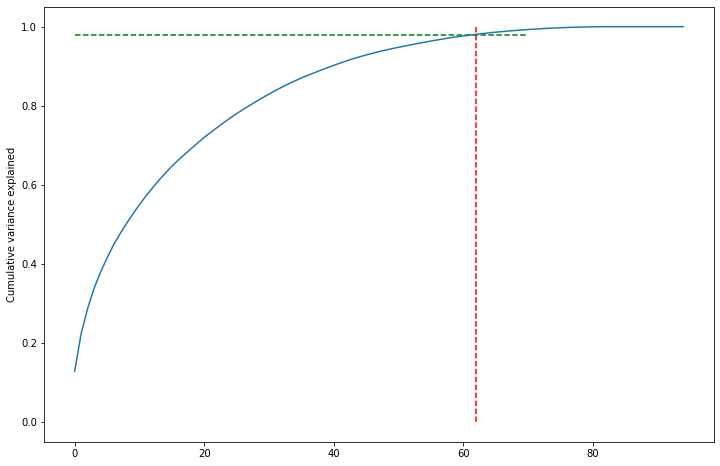

In [129]:
# Making a scree plot for explained variance ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=62, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

We have 62 principal components which explain about 95% variance

Hence performing PCA with 62 PCs

In [128]:
# Performing IncrementalPCA 
pca_final = IncrementalPCA(n_components = 62)

In [129]:
# Fitting on scaled train dataset
X_train_pca = pca_final.fit_transform(X_train)

In [130]:
# Checking shape of pca dataset
X_train_pca.shape

(20207, 62)

In [131]:
# Applying transformation on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8661, 62)

### Random Forest 

In [132]:
# Instantiating random forest classifier
rf = RandomForestClassifier(random_state=100, oob_score=True, n_jobs = -1, class_weight = 'balanced')

In [133]:
# Creating parameters for random forest
params = {
    'max_depth': [2,3,5,10,20,50],
    'min_samples_leaf': [5,10,20,50, 100],
    'n_estimators': [10, 25, 50, 100]
}

In [134]:
# Applying GridSearchCV 
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [135]:
%%time
# Fitting GridSearchCV to train set
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Wall time: 9min 23s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='roc_auc', verbose=1)

In [138]:
# Best score 
grid_search.best_score_

0.8271148051817082

In [139]:
# Best Estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=50,
                       min_samples_leaf=20, n_jobs=-1, oob_score=True,
                       random_state=100)

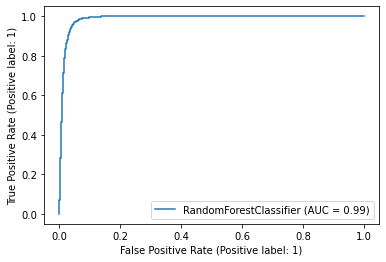

In [140]:
# Plotting ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_best, X_train_pca, y_train)
plt.show()

In [141]:
# Best oob score
rf_best.oob_score_

0.9031523729400702

In [142]:
# Feature Importance of Random Forest Model
rf_best.feature_importances_

array([0.01949745, 0.01299032, 0.02987784, 0.04836833, 0.01648372,
       0.05209745, 0.0129891 , 0.01121741, 0.01091358, 0.01019147,
       0.02040654, 0.01015846, 0.00871107, 0.01053803, 0.02010327,
       0.0101511 , 0.0101369 , 0.01483902, 0.06356883, 0.01256844,
       0.01707746, 0.00943008, 0.01574348, 0.0092813 , 0.01081544,
       0.0096032 , 0.01820512, 0.04344309, 0.03543169, 0.01546264,
       0.01757494, 0.02444779, 0.01023792, 0.025379  , 0.0154383 ,
       0.00841313, 0.01154899, 0.00898856, 0.01282191, 0.03398346,
       0.01304224, 0.0127562 , 0.01033967, 0.0166574 , 0.02061575,
       0.01114732, 0.00896684, 0.01218031, 0.0098164 , 0.00969336,
       0.00804275, 0.00920519, 0.00881728, 0.00943366, 0.00877627,
       0.00908566, 0.00970136, 0.00851316, 0.00900961, 0.00933406,
       0.01477224, 0.01095746])

In [143]:
# Fitting the best model
rf_best_model = rf_best.fit(X_train_pca, y_train)

In [144]:
# Predictions on test set
predictions = rf_best_model.predict(X_test_pca)

In [145]:
# Checking metrics for Random Forest model
metric_2 = []
print("Train Accuracy :", accuracy_score(y_train, rf_best_model.predict(X_train_pca)))
metric_2.append(accuracy_score(y_train, rf_best_model.predict(X_train_pca)))

print("Train Confusion Matrix:")
print(confusion_matrix(y_train, rf_best_model.predict(X_train_pca)))

print("Train Precision Score: ")
print(precision_score(y_train, rf_best_model.predict(X_train_pca)))
metric_2.append(precision_score(y_train, rf_best_model.predict(X_train_pca)))

print("Train Recall Score: ")
print(recall_score(y_train, rf_best_model.predict(X_train_pca)))
metric_2.append(recall_score(y_train, rf_best_model.predict(X_train_pca)))

print("Train F1 Score: ")
print(f1_score(y_train, rf_best_model.predict(X_train_pca)))
metric_2.append(f1_score(y_train, rf_best_model.predict(X_train_pca)))

print("-"*50)

print("Test Accuracy :", accuracy_score(y_test, predictions))
metric_2.append(accuracy_score(y_test, predictions))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Test Precision Score: ")
print(precision_score(y_test, predictions))
metric_2.append(precision_score(y_test, predictions))

print("Test Recall Score: ")
print(recall_score(y_test, predictions))
metric_2.append(recall_score(y_test, predictions))

print("Test F1 Score: ")
print(f1_score(y_test, predictions))
metric_2.append(f1_score(y_test, predictions))

Train Accuracy : 0.9638244172811402
Train Confusion Matrix:
[[17958   596]
 [  135  1518]]
Train Precision Score: 
0.718070009460738
Train Recall Score: 
0.9183303085299456
Train F1 Score: 
0.8059463764268648
--------------------------------------------------
Test Accuracy : 0.9003579263364507
Test Confusion Matrix:
[[7563  380]
 [ 483  235]]
Test Precision Score: 
0.3821138211382114
Test Recall Score: 
0.32729805013927576
Test F1 Score: 
0.3525881470367592


In [153]:
# Creating a table which contain all the metrics

log_table = {'Metric': ['Accuracy Score (Train)','Precision Score (Train)','Recall Score (Train)', 'F1 Score (Train)',
                          'Accuracy Score (Test)','Precision Score (Test)','Recall Score (Test)', 'F1 Score (Test)'], 
        'Logistic Regression': metric_1
        }

log_metric = pd.DataFrame(log_table ,columns = ['Metric', 'Logistic Regression'] )

rf_metric = pd.Series(metric_2, name = 'Random Forest')

final_metric = pd.concat([log_metric, rf_metric], axis = 1)

final_metric

,Metric,Logistic Regression,Random Forest
0,Accuracy Score (Train),0.774954,0.963824
1,Precision Score (Train),0.765137,0.718070
2,Recall Score (Train),0.793468,0.918330
3,F1 Score (Train),0.779045,0.805946
4,Accuracy Score (Test),0.752338,0.900358
5,Precision Score (Test),0.218318,0.382114
6,Recall Score (Test),0.770195,0.327298
7,F1 Score (Test),0.340203,0.352588


<b>Following are the factors for churn behavior in descending significance:</b>

- 'revenue_compare_8': Difference of revenue in August Month and average revenue of June & July month
- Total Revenue in June
- 'loc_ic_mou_7'
- 'monthly_2g_7'
- 'sachet_2g_7'
- 'loc_og_t2m_mou_7'
- 'aon'
- 'arpu_2g_7'
- 'loc_ic_t2m_mou_7'
- 'arpu_6'
- 'roam_og_mou_7'
- 'sachet_3g_7'
- 'arpu_7'
- 'max_rech_data_6'